In [1]:
import pandas as pd
%conda install -c conda-forge pandasql

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandasql as psql
import random as rand


In [3]:
water = pd.read_csv('water_potability.csv')

In [4]:
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
seed_choice = 7
seed = rand.Random(7)

#Removing the NaN values for water data (only NaN values were in ph, sulfate and trihalomethanes)
waternonan = psql.sqldf('select * from water where ph is not null and Sulfate is not null and Trihalomethanes is not null')

In [6]:
#shuffling data
waternonan = waternonan.sample(frac=1)

waternonan

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
482,5.361212,171.315543,24709.728858,4.184891,366.814979,490.658747,15.122672,33.119613,1.812529,1
479,7.442536,180.859091,18223.027080,8.577250,405.320016,564.793485,14.768337,57.757554,2.191138,1
367,8.576740,221.150258,24897.286602,6.222626,341.809210,389.292785,15.952132,36.082583,3.916115,0
1277,5.903994,196.274726,19399.221972,7.641895,328.269272,324.045681,18.505372,77.157802,3.820021,0
491,8.900865,211.306812,9592.151333,8.863272,348.437820,333.775327,18.267951,68.333170,4.518751,1
...,...,...,...,...,...,...,...,...,...,...
52,6.953372,203.146547,11609.109055,5.495738,304.283193,551.143337,9.387781,55.958006,3.651866,0
534,4.692197,221.547773,24211.630770,9.363250,307.713996,406.551667,12.618252,60.003148,4.009006,0
901,6.846060,177.829127,16515.670391,6.147210,308.901696,542.997099,12.626474,60.900254,4.709374,0
1460,7.402653,182.999381,19259.193937,7.632370,295.931373,339.737304,10.494609,83.118742,6.226580,1


In [7]:
#checking no NaN anywhere
check_nan = waternonan['ph' or 'Trihalomethanes' or 'Hardness' or 'Solids' or 'Chloramines' or 'Sulfate' or 'Conductivity' or 'Organic_carbon' or 'Turbidity' or 'Potability'].isnull().sum()
print(check_nan)

0


In [100]:
#data visualisation
import matplotlib.pyplot as plt
import numpy as np

In [101]:
#plt.hist(waternonan.ph)

In [102]:
#plt.hist(waternonan.Trihalomethanes)


In [103]:
#plt.hist(waternonan.Hardness)


In [104]:
#plt.hist(waternonan.Solids)


In [105]:
#plt.hist(waternonan.Chloramines)


In [106]:
#plt.hist(waternonan.Sulfate)


In [107]:
#plt.hist(waternonan.Conductivity)


In [108]:
#plt.hist(waternonan.Organic_carbon)


In [109]:
#plt.hist(waternonan.Turbidity)


In [110]:
#plt.hist(waternonan.Potability)

In [111]:
#corellation heat map
import seaborn as sns

<AxesSubplot:>

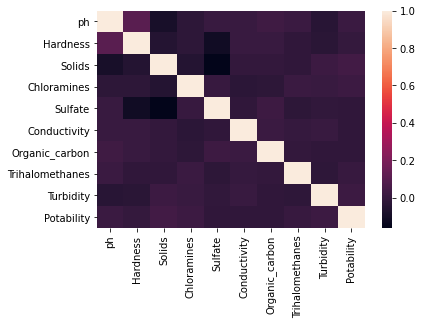

In [112]:
sns.heatmap(waternonan.corr())
#Upshot: not many extraneous variables

In [113]:
#Creating test-train split in data
import random as rand


In [114]:
# 80-20 split training data
index_list = seed.sample(range(2010), 1609)
train_set = waternonan.iloc[index_list]
train_set

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1242,8.111953,217.266472,38184.469574,7.254122,311.910224,281.069203,13.027921,78.582094,4.430750,1
1237,8.813505,236.392817,40684.390014,6.608775,303.529818,278.355123,14.576057,72.872697,4.242460,1
1671,7.150046,238.798230,14708.474185,8.606774,450.914454,365.739122,14.966532,53.144979,2.633891,1
1112,6.513017,185.338540,26262.545482,6.742150,289.014348,410.101309,12.924653,83.652190,3.729961,0
894,8.034012,197.609392,25204.674082,6.501097,330.552173,490.821500,15.107289,89.800947,2.452121,0
...,...,...,...,...,...,...,...,...,...,...
1271,7.446089,179.146836,17763.310993,9.876515,328.459022,364.134173,12.982491,49.051241,2.948657,0
294,7.163999,203.781598,34226.072127,9.412035,320.258917,415.577513,16.221044,90.184208,3.354322,0
250,7.088941,206.364122,13839.713426,8.088242,321.296141,369.969333,14.896092,66.674658,5.661104,1
579,6.848805,204.812711,20555.559572,9.775004,387.686388,389.638228,12.298753,49.452046,3.130045,0


In [115]:
# test data
test_data = waternonan.iloc[waternonan.index.difference(index_list)]
test_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1710,7.266781,178.257710,27468.681707,6.043959,314.390628,400.624987,13.665328,87.131873,3.919827,1
1415,6.791993,210.407967,30471.929098,6.614438,326.585846,493.179417,19.985555,61.120143,2.914057,1
218,8.848586,188.919983,32033.332019,13.127000,182.397370,479.791975,12.070444,77.671337,4.014682,1
1259,7.128062,191.400821,25227.545153,6.607844,319.250859,419.304980,12.865366,78.468491,4.510595,1
104,4.430281,139.685759,28862.257170,8.961372,298.379458,434.781267,17.299294,63.042501,4.384565,0
...,...,...,...,...,...,...,...,...,...,...
432,6.144759,210.979747,19981.315188,9.203614,271.097104,332.598126,17.187963,79.634242,3.082080,1
1226,7.657542,230.820008,35056.232234,7.656807,364.130141,305.629409,18.481396,72.205075,4.792527,1
776,7.482791,186.093432,19621.325105,8.171865,369.190878,475.211460,12.127254,105.165799,4.094746,0
1384,7.855906,209.751802,19850.182892,8.038872,300.292954,368.437561,18.525207,57.238874,4.151890,0


In [139]:
#starting the pipeline
# preprocessing
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold

# model training/tuning
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.dummy import DummyClassifier

# models
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# model validation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, make_scorer


# dataframe viewing rows
pd.set_option('display.max_rows', 100)

In [117]:
feature_list = ['ph', # indicate ph
                'Hardness', # indicates hardness
                'Solids', # indicates solids
                'Chloramines', # indicates Chloramines
                'Sulfate', # indicates Sulfate
                'Conductivity', # indicates Conductivity
                'Organic_carbon', # indicates Organic_carbon
                'Trihalomethanes', # indicates Trihalomethanes
                'Turbidity'] # indicates Turbidity

In [118]:
# define feature column data, list of features feature_list was created in the section above
X = waternonan[feature_list].values

# define label column
y = waternonan['Potability'].values

In [119]:
# make 75/25 train/test split, stratified because I have imbalanced label
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=seed_choice)

In [120]:
# check size of data splits
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1608, 9)
(403, 9)
(1608,)
(403,)


In [121]:
# Define scaler step of pipeline
scaler = Normalizer()

In [122]:
# Define machine learning models

# Logistic Regression:
lr = LogisticRegression(random_state=seed_choice)

# K-nearest Neighbors:
knn = KNeighborsClassifier(n_neighbors=5)

# Naive Bayes:
nb = GaussianNB()

# Random Forest:
rf = RandomForestClassifier(random_state=seed_choice, n_estimators=5, max_depth=10, min_samples_split=10, max_leaf_nodes=13)

# Gradient Boosted Trees:
gb = GradientBoostingClassifier()

# select model to train:
model_name = rf

In [123]:
# define function to get model metrics
def model_metrics(predictions, pipe):
    
    # print summary statistics
    print('Training set score: ' + str(pipe.score(X_train,y_train)))
    print('Test set score: ' + str(pipe.score(X_test,y_test)))
    print(classification_report(y_test, predictions, digits=5))

    # plot confusion matrix
    cm = confusion_matrix(y_test, predictions, normalize='all')
    print(cm)
    disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
    disp_cm.plot()

Training set score: 0.6716417910447762
Test set score: 0.6203473945409429
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       240
           1    0.40447   1.00000   0.57597       163

    accuracy                        0.40447       403
   macro avg    0.20223   0.50000   0.28799       403
weighted avg    0.16359   0.40447   0.23296       403

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


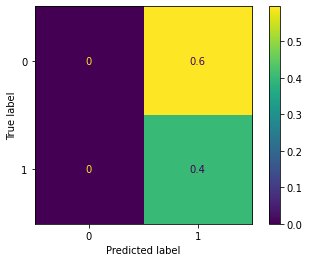

In [124]:
# make pipeline steps
pipe = make_pipeline(scaler,model_name)

# fit data to model
pipe.fit(X_train, y_train)

# save predictions on test set
predictions = model_name.predict(X_test)

# print summary statistics
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))
print(classification_report(y_test, predictions, digits=5))
print(predictions)

# plot confusion matrix
cm = confusion_matrix(y_test, predictions, normalize='all')
print(cm)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

training model:LogisticRegression(random_state=7)
Training set score: 0.5970149253731343
Test set score: 0.5955334987593052
              precision    recall  f1-score   support

           0    0.59453   0.99583   0.74455       240
           1    0.00000   0.00000   0.00000       163

    accuracy                        0.59305       403
   macro avg    0.29726   0.49792   0.37227       403
weighted avg    0.35406   0.59305   0.44340       403

[[0.59305211 0.00248139]
 [0.4044665  0.        ]]
training model:KNeighborsClassifier()
Training set score: 0.6896766169154229
Test set score: 0.5732009925558312
              precision    recall  f1-score   support

           0    0.61888   0.73750   0.67300       240
           1    0.46154   0.33129   0.38571       163

    accuracy                        0.57320       403
   macro avg    0.54021   0.53439   0.52936       403
weighted avg    0.55524   0.57320   0.55680       403

[[0.43920596 0.15632754]
 [0.27047146 0.13399504]]
training

/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachla

training model:RandomForestClassifier(max_depth=10, max_leaf_nodes=13, min_samples_split=10,
                       n_estimators=5, random_state=7)
Training set score: 0.6716417910447762
Test set score: 0.6203473945409429
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       240
           1    0.40447   1.00000   0.57597       163

    accuracy                        0.40447       403
   macro avg    0.20223   0.50000   0.28799       403
weighted avg    0.16359   0.40447   0.23296       403

[[0.        0.5955335]
 [0.        0.4044665]]
training model:GradientBoostingClassifier()
Training set score: 0.7947761194029851
Test set score: 0.6104218362282878
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       240
           1    0.40447   1.00000   0.57597       163

    accuracy                        0.40447       403
   macro avg    0.20223   0.50000   0.28799       403
weighted avg  

/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lachlan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


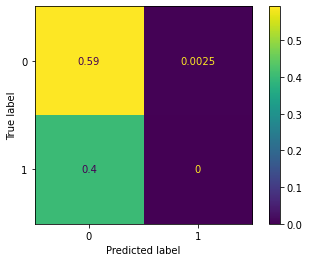

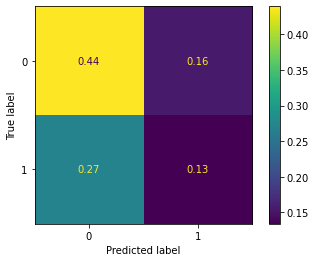

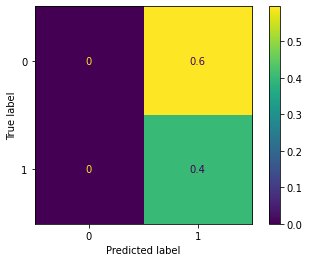

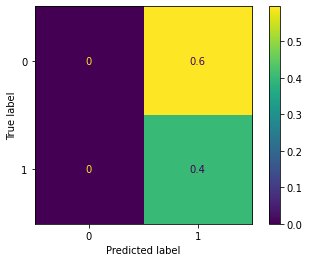

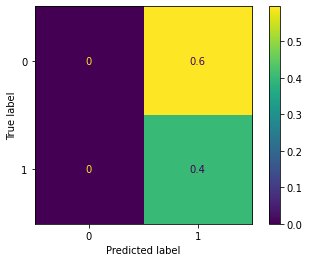

In [125]:
# create loop to test all models at once

model_names = [lr, knn, nb, rf, gb]
for name in model_names:
    print('training model:' + str(name))
    
    # define model name
    model_name = name
    
    # make pipeline steps
    pipe = make_pipeline(scaler,model_name)

    # fit data to model
    pipe.fit(X_train, y_train)

    # save predictions on test set
    predictions = model_name.predict(X_test)

    # print summary statistics
    print('Training set score: ' + str(pipe.score(X_train,y_train)))
    print('Test set score: ' + str(pipe.score(X_test,y_test)))
    print(classification_report(y_test, predictions, digits=5))
#for debugging
#    print(predictions)

    # plot confusion matrix
    cm = confusion_matrix(y_test, predictions, normalize='all')
    print(cm)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## Suggestions on how to improve predictions:
1. probably overfitting
2. tweak some parameters to see if it does stuff
3. simplify models
4. start analysing 



In [126]:
# This is a function I pulled from 
# https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv

# For each hyperparamter it fixes all other parameters to their best values 
# and plots the average score for each value of the hyperparamter.


def plot_search_results(grid):
    
    # Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    # Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    # Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

In [128]:
# define parameter search for each model

# Logistic Regression:
lr = LogisticRegression(random_state=seed_choice, solver='liblinear', max_iter=1000)

lr_param_grid = {'logisticregression__penalty': ['l1', 'l2'],
                 'logisticregression__C': [0.001, 0.01, 0.1, 1.0, 10, 25]
                }

# K-nearest Neighbors:
knn = KNeighborsClassifier(n_neighbors=10)

knn_param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
                  'kneighborsclassifier__weights': ['uniform', 'distance'],
                  'kneighborsclassifier__p': [1,2]
                 }

# Naive Bayes:
nb = GaussianNB()
# There are no meaningful paramters to tune for Naive Bayes model so we willl accept the default implementation.

# Random Forest:
rf = RandomForestClassifier(random_state=seed_choice, n_jobs=-1)

rf_param_grid = {'randomforestclassifier__n_estimators': [5, 10, 25, 50, 100],
                 'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
                 'randomforestclassifier__max_depth': [3, 5, 10, 16],
                 'randomforestclassifier__max_features': ['sqrt', 'log2', 9],
                 'randomforestclassifier__max_samples': [0.25, 0.5, 0.75, 1]
                }

# Gradient Boosted Trees:
gb = GradientBoostingClassifier(random_state=seed_choice)

gb_param_grid = {'gradientboostingclassifier__n_estimators': [10, 25, 50, 100],
                 'gradientboostingclassifier__loss': ['log_loss', 'exponential'],
                 'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.5, 1],
                 'gradientboostingclassifier__subsample': [0.1, 0.5, 0.75, 1],
                 'gradientboostingclassifier__max_depth': [3, 5, 10, 16],
                 'gradientboostingclassifier__max_features': ['sqrt', 'log2', 9],
                }

In [129]:
# define workflow to perform grid search on a model 
#  and print the summary statistics for the best parameters 
#   and plot the results of the cross validation.
def search_train_evaluate_plot(model_name, param_grid, scorer):
    
    # define pipeline
    pipe = make_pipeline(scaler,model_name)

    # define parameter search
    grid_search = GridSearchCV(pipe, param_grid, cv=4, refit = True, verbose = 1, return_train_score=True, scoring=scorer, n_jobs=-1) 

    # train the model on grid search 
    grid_search.fit(X_train, y_train) 

    # print best parameters after tuning 
    print(grid_search.best_params_) 
    best_predictions = grid_search.predict(X_test) 

    # print summary of metrics for best parameters
    model_metrics(best_predictions, grid_search)
    
    # plot results of grid search
    plot_search_results(grid_search)



Fitting 4 folds for each of 16 candidates, totalling 64 fits
{'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'uniform'}
Training set score: 0.6666666666666666
Test set score: 0.6129032258064516
              precision    recall  f1-score   support

           0    0.63548   0.82083   0.71636       240
           1    0.53763   0.30675   0.39062       163

    accuracy                        0.61290       403
   macro avg    0.58656   0.56379   0.55349       403
weighted avg    0.59591   0.61290   0.58461       403

[[0.48883375 0.10669975]
 [0.28039702 0.12406948]]


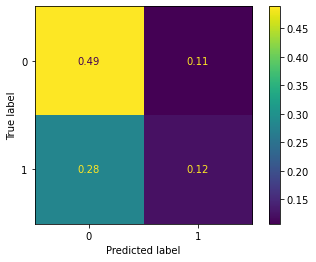

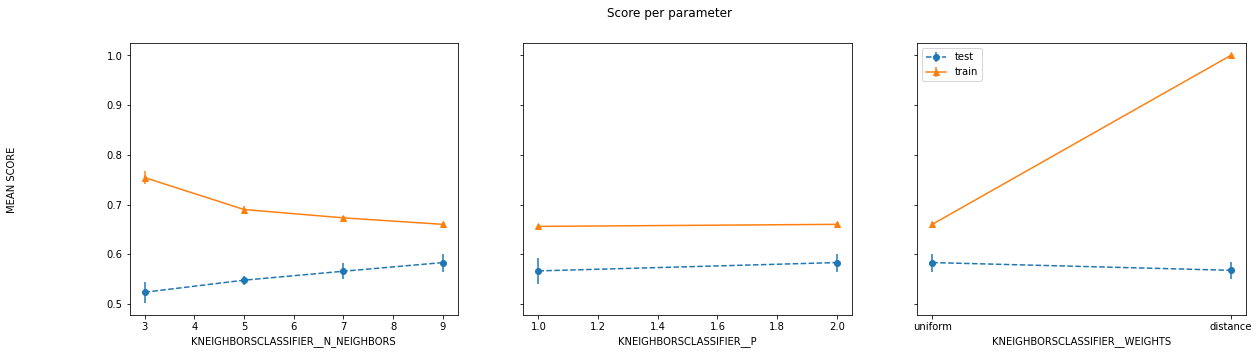

In [130]:
# define names for model
model_name = knn
param_grid = knn_param_grid
scorer = make_scorer(accuracy_score)
#scorer = make_scorer(recall_score)

# run model workflow
search_train_evaluate_plot(model_name, param_grid, scorer)

In [132]:
# define workflow for training and printing model evaluation metrics
def train_and_evaluate(scaler,model_name):
    
    # make pipeline steps
    pipe = make_pipeline(scaler,model_name)

    # fit data to model
    pipe.fit(X_train, y_train)

    # save predictions on test set
    predictions = pipe.predict(X_test)

    # display results and metrics
    model_metrics(predictions, pipe)


training model:LogisticRegression(max_iter=1000, random_state=7, solver='liblinear')
Fitting 4 folds for each of 12 candidates, totalling 48 fits
{'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}
Training set score: 0.5982587064676617
Test set score: 0.5930521091811415
              precision    recall  f1-score   support

           0    0.59453   0.99583   0.74455       240
           1    0.00000   0.00000   0.00000       163

    accuracy                        0.59305       403
   macro avg    0.29726   0.49792   0.37227       403
weighted avg    0.35406   0.59305   0.44340       403

[[0.59305211 0.00248139]
 [0.4044665  0.        ]]


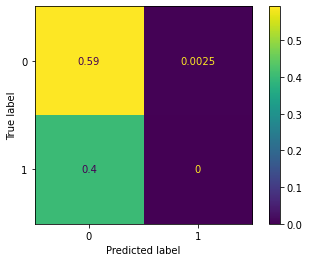

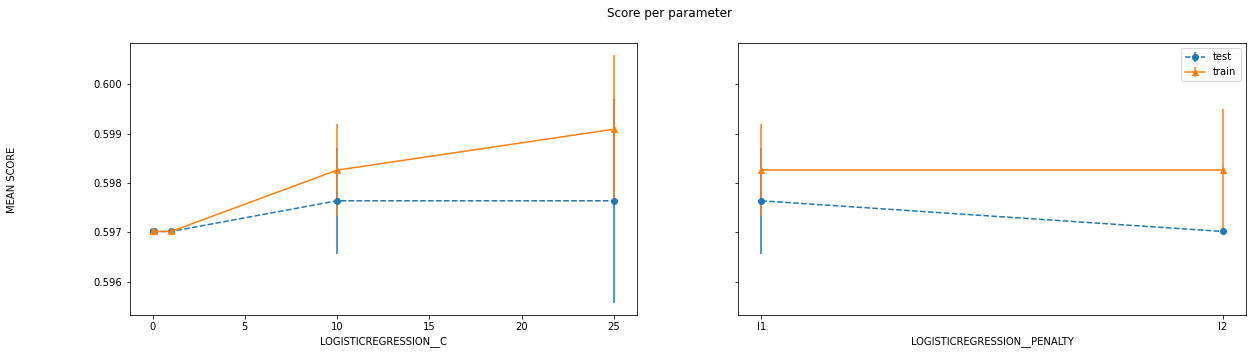

training model:KNeighborsClassifier(n_neighbors=10)
Fitting 4 folds for each of 16 candidates, totalling 64 fits
{'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'uniform'}
Training set score: 0.6666666666666666
Test set score: 0.6129032258064516
              precision    recall  f1-score   support

           0    0.63548   0.82083   0.71636       240
           1    0.53763   0.30675   0.39062       163

    accuracy                        0.61290       403
   macro avg    0.58656   0.56379   0.55349       403
weighted avg    0.59591   0.61290   0.58461       403

[[0.48883375 0.10669975]
 [0.28039702 0.12406948]]


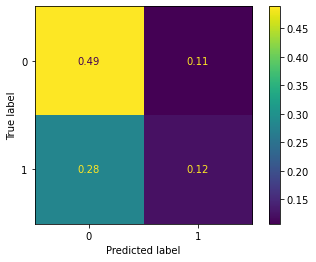

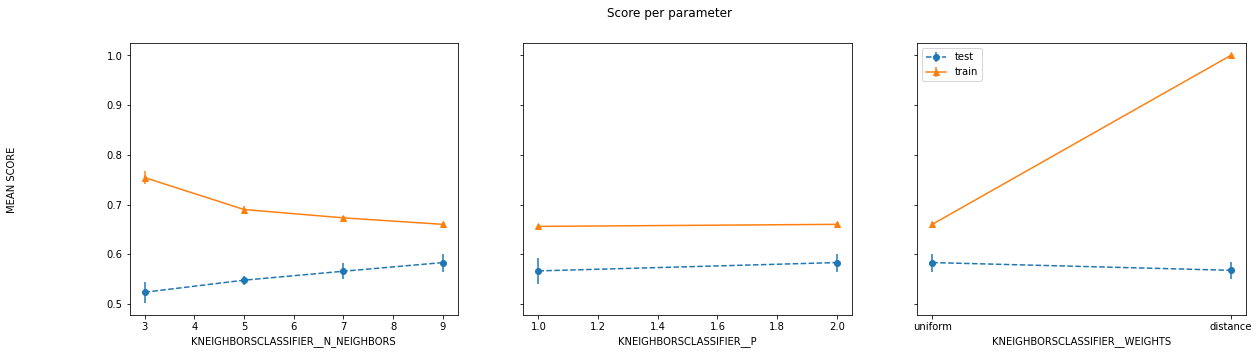

training model:GaussianNB()
Training set score: 0.5839552238805971
Test set score: 0.5831265508684863
              precision    recall  f1-score   support

           0    0.59574   0.93333   0.72727       240
           1    0.40741   0.06748   0.11579       163

    accuracy                        0.58313       403
   macro avg    0.50158   0.50041   0.42153       403
weighted avg    0.51957   0.58313   0.47995       403

[[0.55583127 0.03970223]
 [0.37717122 0.02729529]]
training model:RandomForestClassifier(n_jobs=-1, random_state=7)
Fitting 4 folds for each of 720 candidates, totalling 2880 fits
{'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 16, 'randomforestclassifier__max_samples': 0.5, 'randomforestclassifier__n_estimators': 50}
Training set score: 0.6579601990049752
Test set score: 0.6377171215880894
              precision    recall  f1-score   support

           0    0.62567   0.97500   0.76221 

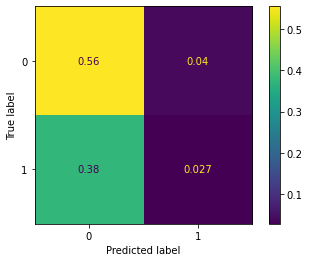

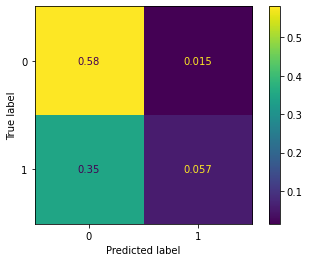

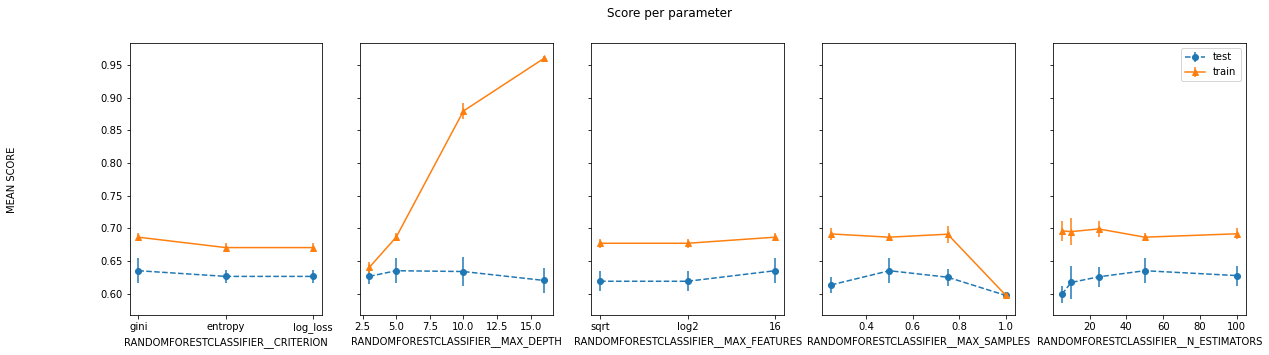

training model:GradientBoostingClassifier(random_state=7)
Fitting 4 folds for each of 1536 candidates, totalling 6144 fits
{'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__loss': 'log_loss', 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__max_features': 16, 'gradientboostingclassifier__n_estimators': 25, 'gradientboostingclassifier__subsample': 0.75}
Training set score: 0.6859452736318408
Test set score: 0.6352357320099256
              precision    recall  f1-score   support

           0    0.63025   0.93750   0.75377       240
           1    0.67391   0.19018   0.29665       163

    accuracy                        0.63524       403
   macro avg    0.65208   0.56384   0.52521       403
weighted avg    0.64791   0.63524   0.56888       403

[[0.55831266 0.03722084]
 [0.32754342 0.07692308]]


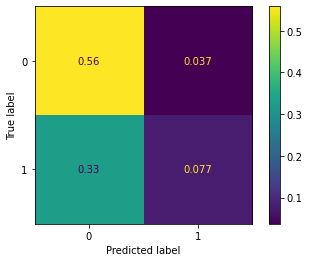

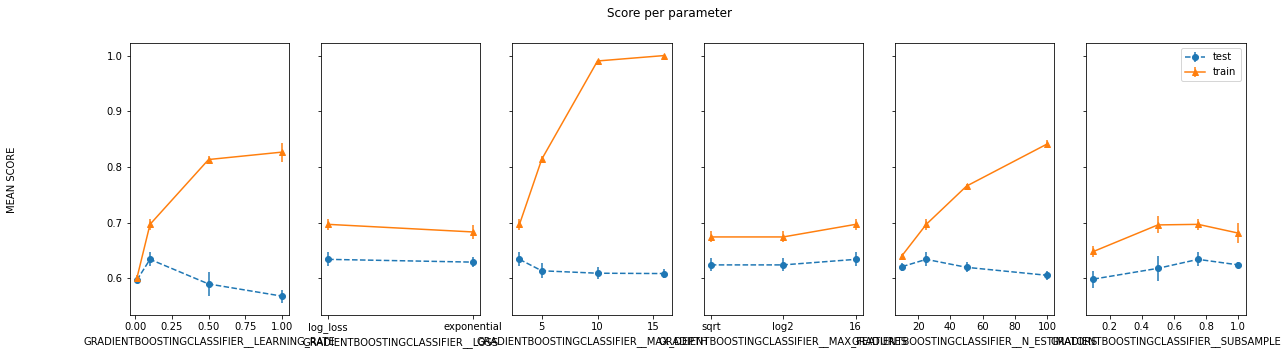

In [133]:
# create loop to test all models at once

scorer = make_scorer(accuracy_score)
#scorer = make_scorer(recall_score)

model_and_param_names = [[lr, lr_param_grid], [knn, knn_param_grid], [nb], [rf, rf_param_grid], [gb, gb_param_grid]]
for name in model_and_param_names:
    
    if name[0] == nb:
        
        print('training model:' + str(name[0]))
    
        train_and_evaluate(scaler,name[0])
    else:
        print('training model:' + str(name[0]))

        search_train_evaluate_plot(name[0], name[1], scorer)

In [136]:
# define best parameters for each model type

# Logistic Regression:
best_lr = LogisticRegression(random_state=seed_choice, solver='liblinear', max_iter=1000, penalty='l1', C=10)

# K-nearest Neighbors:
best_knn = KNeighborsClassifier(n_neighbors=9, weights='uniform', p=2)

# Naive Bayes:
best_nb = GaussianNB()
# There are no meaningful paramters to tune for Naive Bayes model so we willl accept the default implementation.

# Random Forest:
best_rf = RandomForestClassifier(random_state=seed_choice, criterion='gini', max_depth=5, max_features=9, max_samples=0.5, n_estimators=50)

# Gradient Boosted Trees:
best_gb = GradientBoostingClassifier(random_state=seed_choice, n_estimators=25, loss='log_loss', learning_rate=.1, subsample=0.75, max_depth=3, max_features=9)



In [140]:
# define workflow to perform grid search over model types 
#  and print the summary statistics for the best model 
#   and plot the results of the cross validation.

def model_search_train_evaluate_plot(scorer):
    
    # define model type parameters
    param_grid = [{'classifier': [best_lr]},
                  {'classifier': [best_knn]},
                  {'classifier': [best_nb]},
                  {'classifier': [best_rf]},
                  {'classifier': [best_gb]}
                 ]

    pipe = Pipeline([('scaler', scaler),
                     ('classifier', DummyClassifier())
                    ])
    
    
    
    # define parameter search
    grid_search = GridSearchCV(pipe, param_grid, cv=4, refit = True, verbose = 1, return_train_score=True, scoring=scorer, n_jobs=-1) 

    # train the model on grid search 
    grid_search.fit(X_train, y_train) 

    # print best parameters after tuning 
    print(grid_search.best_params_) 
    best_predictions = grid_search.predict(X_test) 

    # print summary of metrics for best parameters
    #model_metrics(best_predictions, grid_search)
    
    # print score for each fit
    print('mean test scores:' + str(grid_search.cv_results_['mean_test_score']))
    print('mean train scores:' + str(grid_search.cv_results_['mean_train_score']))
    x = np.arange(grid_search.cv_results_['mean_test_score'].shape[0])
    plt.plot(x, grid_search.cv_results_['mean_test_score'], 'bo-')
    plt.plot(x, grid_search.cv_results_['mean_train_score'], 'go-')
    
    plt.show()
    

Fitting 4 folds for each of 5 candidates, totalling 20 fits
{'classifier': RandomForestClassifier(max_depth=5, max_features=9, max_samples=0.5,
                       n_estimators=50, random_state=7)}
mean test scores:[0.59763682 0.58333333 0.58271144 0.63495025 0.63432836]
mean train scores:[0.59825871 0.66024046 0.58291874 0.68635987 0.6971393 ]


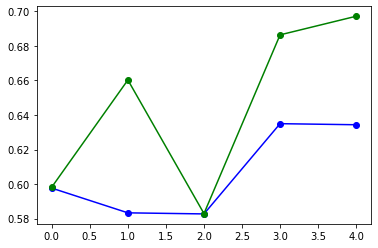

In [141]:
# choose scorer
scorer = make_scorer(accuracy_score)
#scorer = make_scorer(recall_score)

# search over model types
model_search_train_evaluate_plot(scorer)